### 1. 경사 하강법

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 근사 처리하기 위해서 random 사용
# Numpy Random function 3가지
# 1. np.random.randint() : 정수난수 생성 (균일분포를 따르는)
# 2. np.random.rand() : 0부터 1사이의 균일분포에서 난수 생성
#                       return -> matrix array (행열)
# 3. np.random.randn() : 표준정규분포(평균:0,표준편차:1)를 따르는 난수 생성
#                       return -> matrix array (행열)
# 4. np.random.shuffle() : 기본 데이터의 순서 바꾸기
# 5. np.random.choice() : 기존 데이터에서 샘플링

In [5]:
# np.random.randint(end value)
np.random.randint(46) # 0부터 5까지 램덤한 숫자 1개

23

In [6]:
# np.random.randint(start value , end value)
np.random.randint(1, 20) # 1부터 19까지 랜덤 숫자 1개 출력

17

In [7]:
# 2. np.random.rand(개수) : 0부터 1사이의 균일분포에서 난수 생성
#                       return -> matrix array (행열)
np.random.rand(6) 

array([0.46227734, 0.99712884, 0.54819204, 0.4322806 , 0.26366796,
       0.38836234])

In [8]:
np.random.rand(3,2) # 3행 2열

array([[0.4391731 , 0.62035868],
       [0.60855141, 0.16515356],
       [0.16760278, 0.93176592]])

In [9]:
# np.random.randn(개수)
np.random.randn(6)

array([-0.64415099,  0.6464475 , -0.87525234,  0.32565702, -0.21701707,
       -0.06009181])

In [10]:
np.random.randn(3,2)

array([[ 1.26148289, -0.36534811],
       [-1.32025246,  0.90435847],
       [-0.34618884,  2.96201077]])

In [2]:
# 머신러닝 -> 지도학습 -> 데이터와 답 입력 -> 학습 -> 식 찾기
# y = 4 * X + 6 
# 1. 위 식에 근사(오차)한 데이터 생성 -> 2. 답 생성 
# 경사하강 사용해서 위 식에 있는 계수를 도출


In [19]:
np.random.seed(0)
# 위 식을 근사한 데이터 생성 * 노이즈(random)
X = 2 * np.random.rand(100,1)
X[:10]

array([[1.09762701],
       [1.43037873],
       [1.20552675],
       [1.08976637],
       [0.8473096 ],
       [1.29178823],
       [0.87517442],
       [1.783546  ],
       [1.92732552],
       [0.76688304]])

In [20]:
# y : 종속변수  => 답 생성 
# y = 4 * X + 6
# X : 위에서 생성한 100개 데이터(변수) 
y = 6 + 4 * X + np.random.randn(100,1)#  노이즈 추가 답 생성

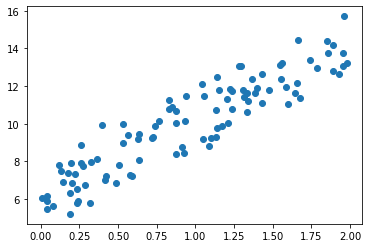

In [21]:
# 시각화 
plt.scatter(X, y)

In [22]:
# 가중치(W1, W0)를 업데이트할 w1_update, w2_update 반환
# 오차 : 원래값 - 예측값 (W0 + W1*X)
# 가중치를 업데이트(수정) 역할
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y) # 원래답의 길이 : 100
    # 먼저 반환할 값을 저장할 배열 선언 (0으로 초기화) 
    w1_update = np.zeros_like(w1) # w1 같은 크기의 배열 생성
    w0_update = np.zeros_like(w0)
    
    # 예측값 (W0 + W1*X)을 구해야 한다.
    y_pred = w0 + np.dot(X, w1.T)
    
    # 오차값(원래값 : y - 예측값 : y_pred) 구한다.
    diff = y - y_pred
    
    # w0 = 1
    w0_fact = np.ones((N,1)) # 100 배열 생성, 1로 초기화 
    
    w1_update = -(2/N) * learning_rate * (np.dot(X.T, diff))
    w0_update = -(2/N) * learning_rate * (np.dot(w0_fact.T, diff))
    
    return w1_update, w0_update


In [23]:
# 경사 하강  : 가중치값(weight) 구하는 함수
# parameter : 데이터, 원래답, 반복횟수 
def gradient_descent_steps(X, y , iters=10000):
    # w0, w1 임의값으로 초기화 (0 초기화)
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    for idx in range(iters):
    # 현재가중치(w0,w1) - 수정된 가중치(get_weight_updates())
        w1_upd, w0_upd = \
        get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_upd
        w0 = w0 - w0_upd
       
    return w1, w0

In [24]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred)) / N # 평균제곱오차
    return cost


In [25]:
# 최적화(오차가 최소화)된 w0, w1 값
w1, w0 = gradient_descent_steps(X, y ,iters=1000)

In [26]:
# w0 : 절편 (원래값 : 6), w1 : 기울기 (원래값 : 4)
print('w1 : {0:.3f}, w0 : {1:.3f}'.format(w1[0,0],w0[0,0]))

w1 : 4.022, w0 : 6.162


In [28]:
# 원래값(y) - 예측값(?)  실제 얼마나 오차가 있는지 확인
y_pred = w1[0,0] * X + w0[0,0]
y_pred[:5], y[:5]

(array([[10.5764825 ],
        [11.91474793],
        [11.01043516],
        [10.54486846],
        [ 9.56975253]]),
 array([[ 9.22535819],
        [12.62234142],
        [11.28776945],
        [ 8.82282178],
        [10.87749059]]))

In [29]:
# 전체 오차
print('전체 오차 : {0:.4f}'.format(get_cost(y,y_pred)))

전체 오차 : 0.9935


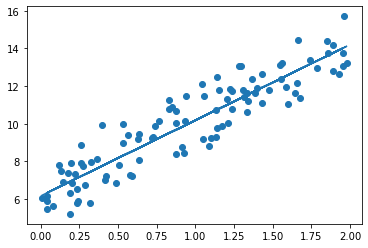

In [31]:
# 원래데이터 : 산점도 (데이터 분포) scatter
# 가중치를 적용한 직선 : plot
plt.scatter(X, y)
plt.plot(X, y_pred)

### 보스턴 주택가격 회귀 구현

In [33]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
# 데이터 로딩
boston = load_boston()

In [37]:
# 원래답 (원래 주택가격)
boston.target.shape

(506,)

In [38]:
# 데이터 셋
boston.data.shape

(506, 13)

In [39]:
# 컬럼명 확인
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [40]:
# 데이터프레임 생성
boston_df = pd.DataFrame(
    boston.data
    , columns=boston.feature_names
)
boston_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [41]:
# 위 데이터프레임에 가격 추가
boston_df['PRICE'] = boston.target
boston_df.shape

(506, 14)

In [42]:
boston_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


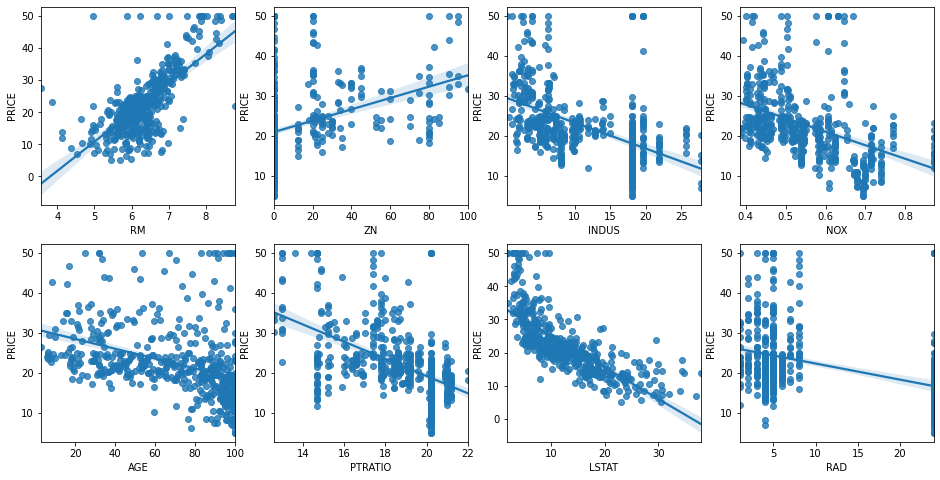

In [43]:
# 시각화 : 산점도(데이터 분포), 상관관계 
# 8개의 피처가 각각 가격에 어떤 관계 시각화
# 8개의 축 필요
# 1장에 8(2 X 4)개의 축을 생성 : subplots() -> (figure , axes)
fig , axs = plt.subplots(
      figsize=(16,8)
    , ncols=4
    , nrows=2
)
# 8개의 피처를 리스트 저장
lm_features = [  'RM' , 'ZN'     , 'INDUS','NOX'
               , 'AGE', 'PTRATIO', 'LSTAT', 'RAD']

for idx, feature in enumerate(lm_features):
    row = int(idx / 4)
    col = idx % 4
    sns.regplot(
        x=feature
        , y='PRICE'
        , data=boston_df
        , ax=axs[row][col]# 표시할 축 지정
    )

In [44]:
# 선형 회귀 구현
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split

In [45]:
# DataFrame => 데이터 분리
X_data = boston_df.drop(
      ['PRICE'] # 삭제할 컬럼
    , axis=1
    , inplace=False
)
# 답을 분리
y_target = boston_df['PRICE']

# 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = \
train_test_split(
    X_data
    , y_target
    , test_size=0.3
    , random_state=156
)

In [46]:
# 모델 객체 생성 / 학습 / 평가
lr = LinearRegression()
lr.fit(X_train, y_train)
# 예측값
y_preds = lr.predict(X_test)

# 평균제곱오차 구하기
mse = mean_squared_error(y_test, y_preds)

# 루트평균제곱오차 
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('성능평가 : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
성능평가 : 0.757


In [49]:
# 계수, 절편 값 확인
# f(x) = w0 x0 + w1 x1  + ...... + w12 x12 + inter(절편)
intercept__ = lr.intercept_ # 절편 저장하고 있는 변수
coef__ = lr.coef_
print('절편값 : ', intercept__)
print('회귀 계수값 : ', np.round(coef__,1))

절편값 :  40.995595172164336
회귀 계수값 :  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [51]:
coeff = pd.Series(
      data=np.round(coef__,1)
    , index=X_data.columns
)
coeff

CRIM       -0.1
ZN          0.1
INDUS       0.0
CHAS        3.0
NOX       -19.8
RM          3.4
AGE         0.0
DIS        -1.7
RAD         0.4
TAX        -0.0
PTRATIO    -0.9
B           0.0
LSTAT      -0.6
dtype: float64

In [52]:
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [53]:
# crose_validation (교차검증)
from sklearn.model_selection import cross_val_score

y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'], axis=1)

lr=LinearRegression()

# 5 Fold로 검증
neg_mse_scores = cross_val_score(
      lr # 적용할 모델
    , X_data   # 전체 데이터 => X_train
    , y_target # 전체 답 => y_train
    , scoring='neg_mean_squared_error'
    , cv=5
)

In [54]:
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [55]:
print('개별 Neg MSE SCORES : ', np.round(neg_mse_scores,2))

개별 Neg MSE SCORES :  [-12.46 -26.05 -33.07 -80.76 -33.31]


In [56]:
print('개별 RMSE SCORES : ', np.round(rmse_scores,2))

개별 RMSE SCORES :  [3.53 5.1  5.75 8.99 5.77]


In [58]:
print('평균 RMSE SCORES : ', np.round(avg_rmse,3))
print('평균 RMSE SCORES : {0:.3f}'.format(avg_rmse))

평균 RMSE SCORES :  5.829
평균 RMSE SCORES : 5.829


### 다항회귀와 과대적합/과소적합 이해

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

In [3]:
# 다항회귀에 사용한 원데이터 생성 : 2행 2열
X = np.arange(4).reshape(2,2)
X

array([[0, 1],
       [2, 3]])

In [7]:
# degree = 2 : 데이터 파생
# 객체만 생성
poly = PolynomialFeatures(degree=2)

# 데이터 파생할 식 구성(학습)
poly.fit(X)

# 데이터 파생(변황)
poly_ftr = poly.transform(X)

print('원래 데이터 : \n', X)
print('변환되 데이터 : \n', poly_ftr)

원래 데이터 : 
 [[0 1]
 [2 3]]
변환되 데이터 : 
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [9]:
# X : 행렬, arange() => ndarray => 브로드캐스팅
def polynomial_func(X):
    y = 1 + 2 * X + X ** 2 + X ** 3
    return y
X = np.arange(4).reshape(2,2)
print('일차 단항식 feature: \n' ,X)
y = polynomial_func(X)
print('일차 단항식 결정값(답): \n', y)

일차 단항식 feature: 
 [[0 1]
 [2 3]]
일차 단항식 결정값(답): 
 [[ 1  5]
 [17 43]]


In [12]:
# PolynomialFeatures(degree=3) : 성능향상 목적
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('일차 단항식 feature: \n' ,X)
print('3차 다항식 feature: \n',poly_ftr)
print('일차 단항식 결정값(답): \n', y)

일차 단항식 feature: 
 [[0 1]
 [2 3]]
3차 다항식 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
일차 단항식 결정값(답): 
 [[ 1  5]
 [17 43]]


In [14]:
# 모델 : 선형 회귀 
from sklearn.linear_model import LinearRegression 

model = LinearRegression()

#  model.fit(X,y) : 원 데이터 학습
# 파생 데이터 학습
model.fit(poly_ftr, y)
print('3차 다항식 feature: \n',poly_ftr)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]
Polynomial 회귀 Shape : (2, 10)


In [15]:
# Pipeline class : 처리 순서 지정해서 일괄처리
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

def polynomial_func(X):
    y = 1 + 2 * X + X ** 2 + X ** 3
    return y

model = Pipeline([
    ('poly', PolynomialFeatures(degree=3)) # 처리순서에 따른 일단위
    ,('linear', LinearRegression())
])
# 원래데이터 생성
X = np.arange(4).reshape(2,2)
# 원래 답 생성
y = polynomial_func(X)

model.fit(X,y)
# 계수 출력 : model.named_steps['linear']
print('계수 출력 \n ', model.named_steps['linear'].coef_)

계수 출력 
  [[0.         0.02402402 0.02402402 0.04804805 0.07207207 0.0960961
  0.0960961  0.14414414 0.21621622 0.31231231]
 [0.         0.05705706 0.05705706 0.11411411 0.17117117 0.22822823
  0.22822823 0.34234234 0.51351351 0.74174174]]


### Polynomial Regression 
#### Underfitting, Overfitting

In [16]:
# PolynomialFeatures : 데이터 파생 확장, 성능 향상
# degree (차수) : 하이퍼 파라미터
# 곡선형 데이터 생성 : cos function 사용
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score # 교차 검증

In [17]:
# random 값으로 구성된 X값에 대해 Consine(곡선) 적용된 값 반환

def true_func(X):
    return np.cos(1.5 * np.pi * X) # 곡선

# random.rand() : X 데이터 => 30 개 생성
np.random.seed(0) # 랜덤값 고정
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y : 답 ,  np.random.randn(n_samples) * 0.1 : 잡음(오차)
y = true_func(X) + np.random.randn(n_samples) * 0.1

In [19]:
X.shape, X.reshape(-1,1).shape

((30,), (30, 1))

In [25]:
# np.newaxis 예제
arr = np.arange(4)
arr.shape, arr

((4,), array([0, 1, 2, 3]))

In [26]:
# arr을 Row 2차원 변경
row_vec = arr[np.newaxis, :]
row_vec.shape

(1, 4)

In [ ]:
# arr을 Col 2차원 변경
col_vec = arr[:, np.newaxis]
col_vec.shape

In [28]:
# arr을 Col 2차원 변경
col_vec = arr[:, None]
col_vec.shape

(4, 1)

In [30]:
arr = np.arange(3*3).reshape(3,3)
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [32]:
arr_3d = arr[np.newaxis, ..., np.newaxis]
arr_3d.shape

(1, 3, 3, 1)

In [33]:
np.newaxis == None

True

Degree 1 MSE 는 0.41 입니다.
Degree 4 MSE 는 0.04 입니다.
Degree 15 MSE 는 181810251.66 입니다.


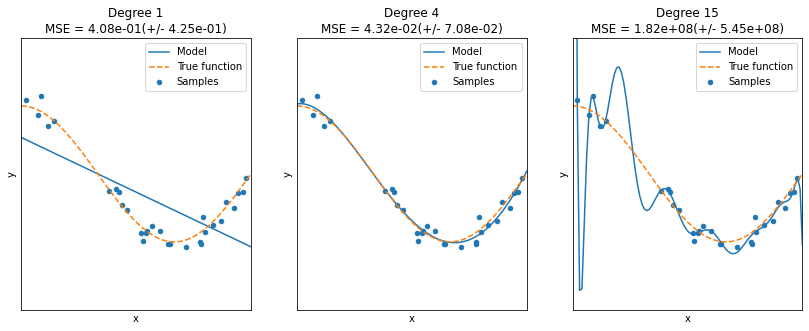

In [39]:
plt.figure(figsize=(14,5))
degrees=[1,4,15]

# plt.subplots() : 여러 축 생성
# plt.subplot() : 한개 축 생성
for i in range(len(degrees)):
#     ax = plt.subplot(1,3,1)
    ax = plt.subplot(1,len(degrees),i+1) # 축 생성
    plt.setp(ax, xticks=(), yticks=()) # 틱의 값을 삭제
    
    # 개별 degree별로 Polynomial 객체 생성
    ploy_feat = PolynomialFeatures(degree=degrees[i])
    # 선형회귀 객체 생성
    linear_reg = LinearRegression()
    # Pipeline 객체 생성
    pipeline = Pipeline([
         ('poly', ploy_feat)
        ,('lreg', linear_reg)
    ])
    # 학습
    pipeline.fit(X.reshape(-1,1),y)
    # 교차 검증 : 오차 (평가)
    scores = cross_val_score(
          pipeline # 모델
        , X.reshape(-1,1) # test data
        , y
        , scoring='neg_mean_squared_error'# 평가지표 지정 => 점수
        , cv=10 # cross_val 개수 지정
    )
    # 계수 저장
    coef__ = pipeline.named_steps['lreg'].coef_
    # 정확도 출력
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(
          degrees[i]
        , -1 * np.mean(scores) # 점수 평균
    ))
    # 시각화
    # 0부터 1까지 테스트 데이터를 100개 생성 -> 예측
    X_test = np.linspace(0,1,100) # (start, end, 나눌 개수)
    # 예측값 곡선
    plt.plot(
          X_test # X축 값
        , pipeline.predict(X_test[:, np.newaxis]) # y축 값 == 예측값 
        , label='Model'
    )
    # 실제값 곡선
    plt.plot(
        X_test
        , true_func(X_test)
        , '--'
        , label='True function'
    )
    # 데이터분포(산점도)
    plt.scatter(
          X  # 원래 데이터
        , y # 원래 답
        , s=20
        , label='Samples'
    )
    
    # 나머지 설정
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim((0,1))
    plt.ylim((-2,2))
    plt.legend(loc='best')
    # title 지정
    out_str = "Degree {}\nMSE = {:.2e}(+/- {:.2e})"
    plt.title(out_str.format(
        degrees[i]
        , -scores.mean()
        , scores.std()
    ))
    # for end

plt.show()

### Regularized Linear Model - Ridge Regression

In [42]:
# boston data loading
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [ ]:
# 보스톤 주택가격 예측/성능평가
boston = load_boston()

# 데이터프레임 생성
boston_df = pd.DataFrame(
      boston.data
    , columns=boston.feature_names
)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

In [44]:
# Ridge object 
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(
      ridge  # 적용할 모델 지정
    , X_data # 데이터 지정
    , y_target # 답 지정
    , scoring='neg_mean_squared_error'# 평가방법
    , cv=5
)

In [45]:
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))

 5 folds 의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]


In [46]:
# RMSE
rmse_scores = np.sqrt(-1*neg_mse_scores)
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))

 5 folds 의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]


In [47]:
# Ridge, alpha = 10 평균 오차
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 평균 RMSE : 5.518 


In [52]:
# Ridge 적용, alpha [0, 0.1, 1, 10, 100]
alphas = [0, 0.1, 1, 10, 100, 150,200]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    neg_mse_scores = cross_val_score(
      ridge  # 적용할 모델 지정
    , X_data # 데이터 지정
    , y_target # 답 지정
    , scoring='neg_mean_squared_error'# 평가방법
    , cv=5
    )
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    out_str = 'alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '
    print(out_str.format(alpha, avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 5.829 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788 
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653 
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518 
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330 
alpha 150 일 때 5 folds 의 평균 RMSE : 5.328 
alpha 200 일 때 5 folds 의 평균 RMSE : 5.341 


In [66]:
X_data = pd.DataFrame(
      boston.data
    , columns=boston.feature_names
)
X_data.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [56]:
import seaborn as sns

C:\Users\TJ\anaconda3\envs\ml01-02\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


IndexError: index 5 is out of bounds for axis 0 with size 5

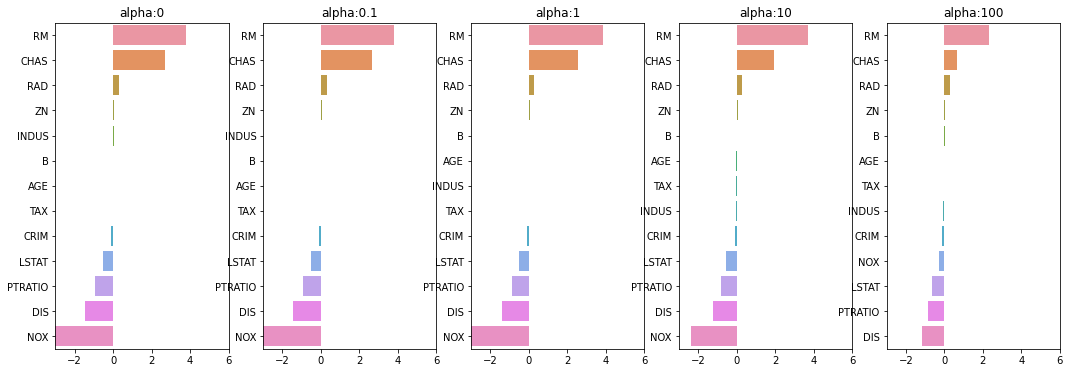

In [57]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data , y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_ , index=X_data.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

### Lasso Regression, ElasticNet

In [59]:
from sklearn.linear_model import Lasso, ElasticNet

In [82]:
# 위 코드를 처리하는 함수 선언
# 보스톤 주택가격 예측/성능평가
boston = load_boston()

# 데이터프레임 생성
boston_df = pd.DataFrame(
      boston.data
    , columns=boston.feature_names
)

boston_df['PRICE'] = boston.target

y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'],axis=1,inplace=False)


def get_linear_reg_eval(
      model_name    # 모델 (Ridge, Lasso, ElasticNet)
    , params_p=None   # parameters => alpha = [0,1,2,3....]
    , X_data_p=None # data
    , y_target_p=None # label
    , verbose=True # 출력 상세 여부
):
    coeff_df = pd.DataFrame()
    # 오차 출력
    if verbose: 
        print('####### ', model_name , '#######')
    
    for param in params_p:
        if model_name == 'Ridge':
            model = Ridge(alpha=param)
        elif model_name == 'Lasso':
            model = Lasso(alpha=param)
        elif model_name == 'ElasticNet':
            model = ElasticNet(alpha=param, l1_ratio=0.7)
        
        # cross_val_score : 점수 구하기만 가능
        neg_mse = cross_val_score(
            model
            , X_data_p
            , y_target_p
            , scoring='neg_mean_squared_error'
            , cv=5
        )
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse))
        out_str = 'alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '
        print(out_str.format(param, avg_rmse))
        
    # 계수값 저장 반환
        model.fit(X_data, y_target)
    # 계수값 Series 저장
        coeff = pd.Series(
             data=model.coef_ # 계수값
            ,index=X_data.columns
        )
        colname = 'alpha : ' + str(param)
        coeff_df[colname] = coeff
    return coeff_df # 계수의 이름(컬럼명), 계수값을 DataFrame


In [75]:
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval(
    'Lasso'
    , params_p=lasso_alphas
    , X_data_p=X_data
    , y_target_p=y_target
)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189 


In [76]:
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_ridge_df =get_linear_reg_eval(
    'Ridge'
    , params_p=lasso_alphas
    , X_data_p=X_data
    , y_target_p=y_target
)

#######  Ridge #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.799 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.700 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 5.589 


In [77]:
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval(
    'ElasticNet'
    , params_p=lasso_alphas
    , X_data_p=X_data
    , y_target_p=y_target
)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.542 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.526 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.467 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.597 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.068 


### 데이터 변환 
- StandardScaler => 정규분포 형태의 값으로 변환
- MinMaxScaler => 최소 0, 최대 1 값으로 변환
- Polynomial => degree 적용, 다항식 적용
- log => 정규분포 형태로 변환

In [78]:
X_data.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

def get_scaled_data(
      method='None' # 변환 방법
    , degree_p=None # 다항식 차수
    , input_data=None # 변환할 데이터
):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
        
    if degree_p != None:
        scaled_data = PolynomialFeatures(
            degree=degree_p
        ).fit_transform(scaled_data)
    
    return scaled_data


In [83]:
alphas = [0.1,1,10,100]

scale_methods = [
      (None, None)
    , ('Standard', None)
    , ('Standard', 2)
    , ('MinMax', None)
    , ('MinMax', 2)
    , ('Log', None)
]

for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(
          method=scale_method[0]
        , degree_p=scale_method[1]
        , input_data=X_data
    )
    out_str = '\n## 변환 유형:{0}, Polynomial Degree:{1}'
    print(out_str.format(scale_method[0], scale_method[1]))
    
    get_linear_reg_eval(
        'Ridge'
        , params_p=alphas
        , X_data_p=X_data_scaled
        , y_target_p=y_target
    )


## 변환 유형:None, Polynomial Degree:None
#######  Ridge #######
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.518 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.330 

## 변환 유형:Standard, Polynomial Degree:None
#######  Ridge #######
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.826 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.803 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.637 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.421 

## 변환 유형:Standard, Polynomial Degree:2
#######  Ridge #######
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 8.827 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.871 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.485 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 4.634 

## 변환 유형:MinMax, Polynomial Degree:None
#######  Ridge #######
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.764 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.465 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.754 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 7.635 

## 변환 유형:MinMax, Polynomial Degree:2
#######  Ridge #######
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.298 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 4.323 
alpha 10일 때 5 